In [36]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import load_img, img_to_array
from keras_preprocessing.sequence import pad_sequences

In [37]:
model_temp = InceptionV3(weights='imagenet')
#xception_model = Xception(include_top=False, pooling="avg")

In [52]:


def extract_features(filename, model):
    
    try:
        image = Image.open(filename)
    except:
        print("ERROR: Can't open image! Ensure that image path and extension is correct")
        image = image.resize((299,299))
        image = np.array(image)
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model_temp.predict(image)
    return feature


def preprocess_image(img):
    img = load_img(img, target_size=(299, 299))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/127.5
    img = img - 1.0
    #img = preprocess_input(img)
    return img


def encode_image(img):
    img = preprocess_image(img)
    feature_vector = model_temp.predict(img)
    feature_vector = feature_vector.reshape(1, feature_vector.shape[1])
    return feature_vector

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word

    return None

def generate_desc(model, tokenizer, photo, max_length):
    
    in_text = 'startseq'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        
        if word is None:
            break
    
        in_text += ' ' + word
        
        if word == 'endseq':
            break
    
    final_caption = in_text.split()
    final_caption = final_caption[1:-1]
    final_caption = ' '.join(final_caption)
            
    return final_caption



nn
man in red shirt is standing on the street


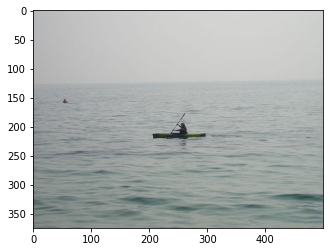

In [56]:
from pickle import load
from keras.models import Model, load_model
from tensorflow.keras.applications.xception import Xception, preprocess_input

max_length = 38
img_path = '../static/19212715_20476497a3.jpg'
tok_path = '../tokenizer.p'

tokenizer = load(open(tok_path,"rb"))
model = load_model('../models/model_2.h5')

photo = encode_image(img_path)

img = Image.open(img_path)
description = generate_desc(model, tokenizer, photo, max_length)
print("nn")

plt.imshow(img)
print(description)